Basis Pursuit DeNoising
=======================

This example demonstrates the use of class [fista.bpdn.BPDN](http://sporco.rtfd.org/en/latest/modules/sporco.fista.bpdn.html#sporco.fista.bpdn.BPDN) to solve the Basis Pursuit DeNoising (BPDN) problem [[11]](http://sporco.rtfd.org/en/latest/zreferences.html#chen-1998-atomic)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \| D \mathbf{x} - \mathbf{s} \|_2^2 + \lambda \| \mathbf{x} \|_1 \;,$$

where $D$ is the dictionary, $\mathbf{x}$ is the sparse representation, and $\mathbf{s}$ is the signal to be represented. In this example the BPDN problem is used to estimate the reference sparse representation that generated a signal from a noisy version of the signal.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.fista import bpdn
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Configure problem size, sparsity, and noise level.

In [2]:
N = 512      # Signal size
M = 4*N      # Dictionary size
L = 32       # Number of non-zero coefficients in generator
sigma = 0.5  # Noise level

Construct random dictionary, reference random sparse representation, and test signal consisting of the synthesis of the reference sparse representation with additive Gaussian noise.

In [3]:
# Construct random dictionary and random sparse coefficients
np.random.seed(12345)
D = np.random.randn(N, M)
x0 = np.zeros((M, 1))
si = np.random.permutation(list(range(0, M-1)))
x0[si[0:L]] = np.random.randn(L, 1)

# Construct reference and noisy signal
s0 = D.dot(x0)
s = s0 + sigma*np.random.randn(N,1)

Set BPDN solver with standard FISTA Bactracking.

In [4]:
L_sc = 9.e2
opt = bpdn.BPDN.Options({'Verbose': True, 'MaxMainIter': 50,
                    'BackTrack': {'Enabled': True }, 'L': L_sc})


lmbda = 2.98e1

print("")
b = bpdn.BPDN(D, s, lmbda, opt)
x = b.solve()

print("BPDN standard FISTA backtracking solve time: %.2fs" %
      b.timer.elapsed('solve'))
print("")


Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------
   0  3.08e+03  1.59e+03  5.00e+01  1.68e+00  1.59e+03  2.24e+03      7  3.22e+03
   1  2.45e+03  8.43e+02  5.39e+01  4.96e-01  8.43e+02  1.05e+03      0  3.22e+03
   2  2.16e+03  4.93e+02  5.61e+01  2.61e-01  4.93e+02  5.69e+02      0  3.22e+03
   3  1.99e+03  3.48e+02  5.52e+01  1.79e-01  3.48e+02  3.94e+02      0  3.22e+03
   4  1.86e+03  2.77e+02  5.31e+01  1.48e-01  2.77e+02  3.09e+02      0  3.22e+03
   5  1.75e+03  2.40e+02  5.07e+01  1.31e-01  2.40e+02  2.66e+02      0  3.22e+03
   6  1.65e+03  2.21e+02  4.81e+01  1.20e-01  2.21e+02  2.42e+02      0  3.22e+03
   7  1.56e+03  2.08e+02  4.55e+01  1.11e-01  2.08e+02  2.27e+02      0  3.22e+03
   8  1.48e+03  1.97e+02  4.31e+01  1.05e-01  1.97e+02  2.13e+02      0  3.22e+03
   9  1.41e+03  1.86e+02  4.09e+01  9.78e-02  1.86e+02  2.00e+02      0  3.22e+03
  10  1.33e+03 

  39  8.20e+02  8.92e+01  2.45e+01  6.82e-03  8.92e+01  8.93e+01      0  3.22e+03
  40  8.20e+02  8.89e+01  2.45e+01  5.97e-03  8.89e+01  8.90e+01      0  3.22e+03
  41  8.20e+02  8.87e+01  2.45e+01  5.24e-03  8.87e+01  8.88e+01      0  3.22e+03
  42  8.20e+02  8.85e+01  2.45e+01  4.90e-03  8.85e+01  8.86e+01      0  3.22e+03
  43  8.20e+02  8.83e+01  2.45e+01  4.37e-03  8.83e+01  8.84e+01      0  3.22e+03
  44  8.20e+02  8.83e+01  2.45e+01  3.19e-03  8.83e+01  8.83e+01      0  3.22e+03
  45  8.20e+02  8.82e+01  2.45e+01  3.12e-03  8.82e+01  8.82e+01      0  3.22e+03
  46  8.20e+02  8.81e+01  2.45e+01  3.90e-03  8.81e+01  8.82e+01      0  3.22e+03
  47  8.20e+02  8.80e+01  2.45e+01  3.57e-03  8.80e+01  8.80e+01      0  3.22e+03
  48  8.20e+02  8.79e+01  2.46e+01  2.87e-03  8.79e+01  8.79e+01      0  3.22e+03
  49  8.20e+02  8.79e+01  2.46e+01  2.65e-03  8.79e+01  8.79e+01      0  3.22e+03
---------------------------------------------------------------------------------
BPDN standard FI

Plot comparison of reference and recovered representations.

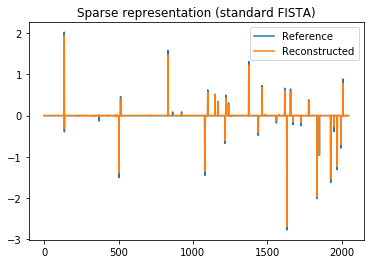

In [5]:
plot.plot(np.hstack((x0, x)), title='Sparse representation (standard FISTA)',
          lgnd=['Reference', 'Reconstructed'])

Plot lmbda error curve, functional value, residuals, and rho

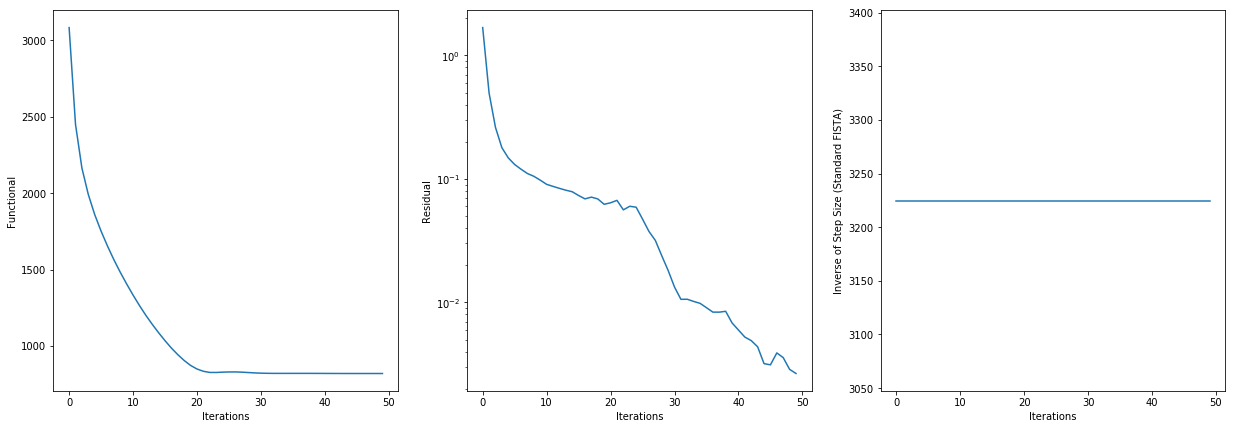

In [6]:
its = b.getitstat()
fig = plot.figure(figsize=(21, 7))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(its.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.L, xlbl='Iterations',
          ylbl='Inverse of Step Size (Standard FISTA)', fig=fig)
fig.show()